# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---
## 2. Load data

In [2]:
cleaned_df = pd.read_csv('./clean_data_after_eda.csv')

In [3]:
cleaned_df.sample(10)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
2340,05835bbd3437ed7af718a5f8182ddae8,foosdfpfkusacimwkcsosbicdxkicaua,6864,0,1121,2009-05-18,2016-05-18,2009-05-18,2015-05-23,817.26,...,0.000003,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,0.000003,0.000000e+00,0.000000e+00,0
10488,b61c153d18317e57ccdafaf4e6d8adc8,MISSING,72253,29946,3970,2010-01-08,2016-03-06,2015-03-09,2015-03-09,2412.91,...,0.000011,2.896760e-06,4.860000e-10,0.000000,0.0,0.0,0.000011,2.896760e-06,4.860000e-10,0
6371,af3787bc69cf7366692ebba17565954c,foosdfpfkusacimwkcsosbicdxkicaua,4100379,0,443297,2013-06-14,2016-05-06,2014-05-02,2015-05-13,1205.52,...,0.000004,9.450150e-08,0.000000e+00,0.000000,0.0,0.0,0.000004,9.450150e-08,0.000000e+00,0
12886,9c17c41a36b745e3263c861b26dccff0,MISSING,5853,1083,0,2010-01-14,2016-03-07,2010-01-14,2015-03-09,551.62,...,0.000004,9.450150e-08,0.000000e+00,0.000000,0.0,0.0,0.000004,9.450150e-08,0.000000e+00,0
7617,857b2c1877cb61ca00c6279680b2868d,foosdfpfkusacimwkcsosbicdxkicaua,3543,0,0,2009-09-15,2016-09-15,2009-09-15,2015-09-16,530.75,...,0.000003,0.000000e+00,0.000000e+00,0.009482,0.0,0.0,0.009485,0.000000e+00,0.000000e+00,0
11175,9884766f3908f65c94e408bcc1325867,foosdfpfkusacimwkcsosbicdxkicaua,14325,0,1193,2012-01-09,2017-01-09,2015-11-17,2016-01-10,2116.59,...,0.000004,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,0.000004,0.000000e+00,0.000000e+00,0
363,6b2f0b6e87aaa8d4320cd63eea857227,foosdfpfkusacimwkcsosbicdxkicaua,2233,4994,0,2012-01-11,2017-01-17,2014-01-17,2016-01-18,231.13,...,0.000011,2.896760e-06,4.860000e-10,0.000000,0.0,0.0,0.000011,2.896760e-06,4.860000e-10,0
3580,6ebe9351b6bf4e68d86a4090f80c80ab,usilxuppasemubllopkaafesmlibmsdf,12123,0,0,2012-05-25,2016-05-25,2012-05-25,2015-06-03,1789.66,...,0.000003,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,0.000003,0.000000e+00,0.000000e+00,0
5885,8bb4f0b5b53d1d2aa3cfd6ff75491930,foosdfpfkusacimwkcsosbicdxkicaua,21122,8645,1771,2012-03-06,2016-03-06,2012-03-06,2015-03-09,2190.92,...,0.000011,2.896760e-06,4.860000e-10,0.000000,0.0,0.0,0.000011,2.896760e-06,4.860000e-10,1
1647,3be19b7a234cd276337c27ca3646da59,foosdfpfkusacimwkcsosbicdxkicaua,12529,0,0,2009-02-09,2016-02-09,2015-12-15,2015-02-11,1403.78,...,0.000003,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,0.000003,0.000000e+00,0.000000e+00,0


In [4]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [5]:
cleaned_df['date_activ'] = pd.to_datetime(cleaned_df['date_activ'], format='%Y-%m-%d')
cleaned_df['date_end'] = pd.to_datetime(cleaned_df['date_end'], format='%Y-%m-%d')
cleaned_df['date_modif_prod'] = pd.to_datetime(cleaned_df['date_modif_prod'], format='%Y-%m-%d')
cleaned_df['date_renewal'] = pd.to_datetime(cleaned_df['date_renewal'], format='%Y-%m-%d')

In [6]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

In [7]:
price_df = pd.read_csv('./price_data.csv')
price_df['price_date'] = pd.to_datetime(price_df['price_date'], format='%Y-%m-%d')
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  193002 non-null  object        
 1   price_date          193002 non-null  datetime64[ns]
 2   price_off_peak_var  193002 non-null  float64       
 3   price_peak_var      193002 non-null  float64       
 4   price_mid_peak_var  193002 non-null  float64       
 5   price_off_peak_fix  193002 non-null  float64       
 6   price_peak_fix      193002 non-null  float64       
 7   price_mid_peak_fix  193002 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 11.8+ MB


---

## 3. Feature engineering

The goal of this section is to determine essensial features for our futur predictions and delete the unnecessary ones. I will also define new features if needed.

### Difference between off-peak prices in December and Preceeding January

In [8]:
# Off-peak prices by companies and month
monthly_mean_price = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# January and December prices
jan_prices = monthly_mean_price.sort_values('price_date').groupby('id').first().reset_index()
dec_prices = monthly_mean_price.sort_values('price_date').groupby('id').last().reset_index()

# Calculate the difference
diff_off_peak = pd.merge(dec_prices, jan_prices, on='id', suffixes=('_dec', '_jan'))
diff_off_peak['offpeak_price_diff_dec_jan_energy'] = diff_off_peak['price_off_peak_var_dec'] - diff_off_peak['price_off_peak_var_jan']
diff_off_peak['offpeak_price_diff_dec_jan_power'] = diff_off_peak['price_off_peak_fix_dec'] - diff_off_peak['price_off_peak_fix_jan']
diff_off_peak = diff_off_peak[['id', 'offpeak_price_diff_dec_jan_energy', 'offpeak_price_diff_dec_jan_power']]

diff_off_peak.head(8)

,id,offpeak_price_diff_dec_jan_energy,offpeak_price_diff_dec_jan_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001
5,00126c87cf78d7604278f0a9adeb689e,-0.012908,0.162916
6,0013f326a839a2f6ad87a1859952d227,-0.006171,0.000000
7,00184e957277eeef733a7b563fdabd06,-0.004111,-0.000001


In [9]:
diff_off_peak.describe()

,offpeak_price_diff_dec_jan_energy,offpeak_price_diff_dec_jan_power
count,16096.000000,16096.000000
mean,-0.004545,0.279544
std,0.012778,1.432820
min,-0.148477,-44.266931
25%,-0.008161,0.000004
50%,-0.005610,0.162916
75%,-0.003573,0.177779
max,0.168958,40.728885


In [10]:
# Peak prices by companies and month
monthly_mean_price = price_df.groupby(['id', 'price_date']).agg({'price_peak_var': 'mean', 'price_peak_fix': 'mean'}).reset_index()

# January and December prices
jan_prices = monthly_mean_price.sort_values('price_date').groupby('id').first().reset_index()
dec_prices = monthly_mean_price.sort_values('price_date').groupby('id').last().reset_index()

# Calculate the difference
diff_peak = pd.merge(dec_prices, jan_prices, on='id', suffixes=('_dec', '_jan'))
diff_peak['peak_price_diff_dec_jan_energy'] = diff_peak['price_peak_var_dec'] - diff_peak['price_peak_var_jan']
diff_peak['peak_price_diff_dec_jan_power'] = diff_peak['price_peak_fix_dec'] - diff_peak['price_peak_fix_jan']
diff_peak = diff_peak[['id', 'peak_price_diff_dec_jan_energy', 'peak_price_diff_dec_jan_power']]

diff_peak.head(8)

,id,peak_price_diff_dec_jan_energy,peak_price_diff_dec_jan_power
0,0002203ffbb812588b632b9e628cc38d,-0.002302,0.097749
1,0004351ebdd665e6ee664792efc4fd13,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,-0.005120,0.097749
4,00114d74e963e47177db89bc70108537,0.000000,0.000000
5,00126c87cf78d7604278f0a9adeb689e,-0.008010,0.097749
6,0013f326a839a2f6ad87a1859952d227,-0.002351,0.000000
7,00184e957277eeef733a7b563fdabd06,0.000000,0.000000


In [11]:
diff_peak.describe()

,peak_price_diff_dec_jan_energy,peak_price_diff_dec_jan_power
count,16096.000000,16096.000000
mean,-0.000976,-0.048744
std,0.011173,2.338325
min,-0.143815,-36.344726
25%,-0.003317,0.000000
50%,0.000000,0.000000
75%,0.000000,0.097749
max,0.148474,36.490689


In [12]:
# Mid-peak prices by companies and month
monthly_mean_price = price_df.groupby(['id', 'price_date']).agg({'price_mid_peak_var': 'mean', 'price_mid_peak_fix': 'mean'}).reset_index()

# January and December prices
jan_prices = monthly_mean_price.sort_values('price_date').groupby('id').first().reset_index()
dec_prices = monthly_mean_price.sort_values('price_date').groupby('id').last().reset_index()

# Calculate the difference
diff_mid_peak = pd.merge(dec_prices, jan_prices, on='id', suffixes=('_dec', '_jan'))
diff_mid_peak['midPeak_price_diff_dec_jan_energy'] = diff_mid_peak['price_mid_peak_var_dec'] - diff_mid_peak['price_mid_peak_var_jan']
diff_mid_peak['midPeak_price_diff_dec_jan_power'] = diff_mid_peak['price_mid_peak_fix_dec'] - diff_mid_peak['price_mid_peak_fix_jan']
diff_mid_peak = diff_mid_peak[['id', 'midPeak_price_diff_dec_jan_energy', 'midPeak_price_diff_dec_jan_power']]

diff_mid_peak.head(8)

,id,midPeak_price_diff_dec_jan_energy,midPeak_price_diff_dec_jan_power
0,0002203ffbb812588b632b9e628cc38d,0.003487,0.065166
1,0004351ebdd665e6ee664792efc4fd13,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.000763,0.065166
4,00114d74e963e47177db89bc70108537,0.000000,0.000000
5,00126c87cf78d7604278f0a9adeb689e,-0.002127,0.065166
6,0013f326a839a2f6ad87a1859952d227,0.003371,0.000000
7,00184e957277eeef733a7b563fdabd06,0.000000,0.000000


In [13]:
diff_mid_peak.describe()

,midPeak_price_diff_dec_jan_energy,midPeak_price_diff_dec_jan_power
count,16096.000000,16096.000000
mean,0.000399,-0.028724
std,0.007403,1.463097
min,-0.098720,-16.724389
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000718,0.065166
max,0.103502,16.791555


### Tenure

In [14]:
cleaned_df.groupby(['num_years_antig']).agg({'churn': 'mean'}).sort_values(by='churn', ascending=False)

,churn
num_years_antig,
2,0.272727
3,0.135224
4,0.118533
12,0.100000
5,0.086319
7,0.082515
13,0.076923
6,0.071084
11,0.064865


It seems like all the clients with less or equal to 4 years of antiquity are churning. Antiquity is an important feature that we must consider.

### Dealing with categorical data

In [15]:
# has_gas data
cleaned_df['has_gas'] = cleaned_df['has_gas'].replace(['t', 'f'], [1, 0])
cleaned_df.groupby(['has_gas']).agg({'churn': 'mean'})

,churn
has_gas,
0,0.100544
1,0.081856


Clients with no gas subscription are more likely to churn. This is evident since clients with more engagement are interested in PowerCo's services.

In [16]:
# channel_sales data
cleaned_df['channel_sales'].value_counts()

channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: count, dtype: int64

As i explained before, missing values in the channel_sales column don't seem to be impacting our analysis. We might use the information to classify clients by sales channel in order to track in detail there activity but predicting which clients are likely to churn won't rely on this information.

We have 8 categories, so we’ll create 8 dummy variables from this column. However, the last three categories have 11, 3 and 1 occurrences, respectively. Since our dataset has about 14606 rows, dummy variables with very few occurrences will likely not contribute much to the model’s predictive power, as they don’t provide significant information.

In [17]:
df = pd.get_dummies(cleaned_df, columns=['channel_sales'], prefix='channel')
df = df.drop(columns=['channel_sddiedcslfslkckwlfkdpoeeailfpeds', 'channel_epumfxlbckeskwekxbiuasklxalciiuu', 'channel_fixdbufsefwooaasfcxdxadsiekoceaa'])

dummy_columns = df.filter(like='channel_').columns
df[dummy_columns] = df[dummy_columns].astype(int)

df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,...,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,...,44.235794,2.086425,9.953056e+01,4.423670e+01,1,0,0,1,0,0
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,...,0.000000,0.009485,1.217891e-03,0.000000e+00,0,1,0,0,0,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,...,0.000000,0.000004,9.450150e-08,0.000000e+00,0,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,...,0.000000,0.000003,0.000000e+00,0.000000e+00,0,0,0,0,1,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,...,0.000000,0.000011,2.896760e-06,4.860000e-10,0,1,0,0,0,0


In [18]:
# origin_up data
cleaned_df['origin_up'].value_counts()

origin_up
lxidpiddsbxsbosboudacockeimpuepw    7097
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: count, dtype: int64

As we said about channel_sales, the code of the electricity campaign the customer first subscribed to. This is something that could be used for marketing purposes, that could be another project :). But at first sight we can realize that most of the clients were subscribed to 3 main compaigns, those are the one the marketing team should focus on and try to improve the other ones to attract more clients.

As we saw earlier, we can drop the last three categories as they don't provide don’t provide significant information.

In [19]:
df = pd.get_dummies(df, columns=['origin_up'], prefix='origin_up')
df = df.drop(columns=['origin_up_MISSING', 'origin_up_usapbepcfoloekilkwsdiboslwaxobdp', 'origin_up_ewxeelcelemmiwuafmddpobolfuxioce'])

dummy_columns = df.filter(like='origin_').columns
df[dummy_columns] = df[dummy_columns].astype(int)

df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,...,var_6m_price_mid_peak,churn,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,...,4.423670e+01,1,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,...,0.000000e+00,0,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,...,0.000000e+00,0,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,...,0.000000e+00,0,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,...,4.860000e-10,0,1,0,0,0,0,1,0,0


Back to the goal : predicting customer churn based on some metrics.

---
## Dealing with highly skewed data

In the previous section, we noted that some variables were highly skewed. It’s important to address skewness because certain predictive models have inherent assumptions about the distribution of input features.

These models, known as parametric models, generally assume that all variables are both independent and normally distributed.

While skewness isn’t always negative, addressing highly skewed variables is beneficial for the reasons mentioned and because it can enhance the speed at which predictive models converge to their optimal solutions.

There are several methods to handle skewed variables, such as applying transformations like the square root, cube root, or logarithm to continuous numerical columns. In this project, we will use the “logarithm” transformation for positively skewed features.

Note: Since we can’t apply a logarithm to a value of 0, we will add a constant of 1 to all values.

In [20]:
# Apply log10 transformation
df["cons_12m"] = np.log10(df["cons_12m"] + 1)
df["cons_gas_12m"] = np.log10(df["cons_gas_12m"] + 1)
df["cons_last_month"] = np.log10(df["cons_last_month"] + 1)
df["forecast_cons_12m"] = np.log10(df["forecast_cons_12m"] + 1)
df["forecast_cons_year"] = np.log10(df["forecast_cons_year"] + 1)
df["forecast_meter_rent_12m"] = np.log10(df["forecast_meter_rent_12m"] + 1)
df["imp_cons"] = np.log10(df["imp_cons"] + 1)

In [21]:
df['churn']

0        1
1        0
2        0
3        0
4        0
        ..
14601    0
14602    1
14603    1
14604    0
14605    0
Name: churn, Length: 14606, dtype: int64

In [22]:
df.describe()

,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,...,var_6m_price_mid_peak,churn,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
count,14606.000000,14606.000000,14606.000000,14606,14606,14606,14606,14606.000000,14606.000000,14606.000000,...,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,4.223939,0.779244,2.264646,2011-01-28 07:54:18.879912448,2016-07-27 20:48:26.422018560,2013-01-02 12:29:10.951663872,2015-07-21 06:59:00.353279488,2.962177,1.784610,0.966726,...,6.344275e-01,0.097152,0.255032,0.061139,0.462413,0.126181,0.094139,0.293989,0.215528,0.485896
min,0.000000,0.000000,0.000000,2003-05-09 00:00:00,2016-01-28 00:00:00,2003-05-09 00:00:00,2013-06-26 00:00:00,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.754023,0.000000,0.000000,2010-01-15 00:00:00,2016-04-27 06:00:00,2010-08-12 00:00:00,2015-04-17 00:00:00,2.695477,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.149727,0.000000,2.899547,2011-03-04 00:00:00,2016-08-01 00:00:00,2013-06-19 00:00:00,2015-07-27 00:00:00,3.046836,2.498311,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.610285,0.000000,3.529430,2012-04-19 00:00:00,2016-10-31 00:00:00,2015-06-16 00:00:00,2015-10-29 00:00:00,3.380716,3.242231,0.000000,...,4.860000e-10,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,6.792889,6.618528,5.887169,2014-09-01 00:00:00,2017-06-13 00:00:00,2016-01-29 00:00:00,2016-01-28 00:00:00,4.918575,5.243970,30.000000,...,8.087765e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,0.884515,1.717071,1.769305,NaN,NaN,NaN,NaN,0.683592,1.584986,5.108289,...,5.895470e+00,0.296175,0.435894,0.239594,0.498602,0.332065,0.292033,0.455602,0.411202,0.499818


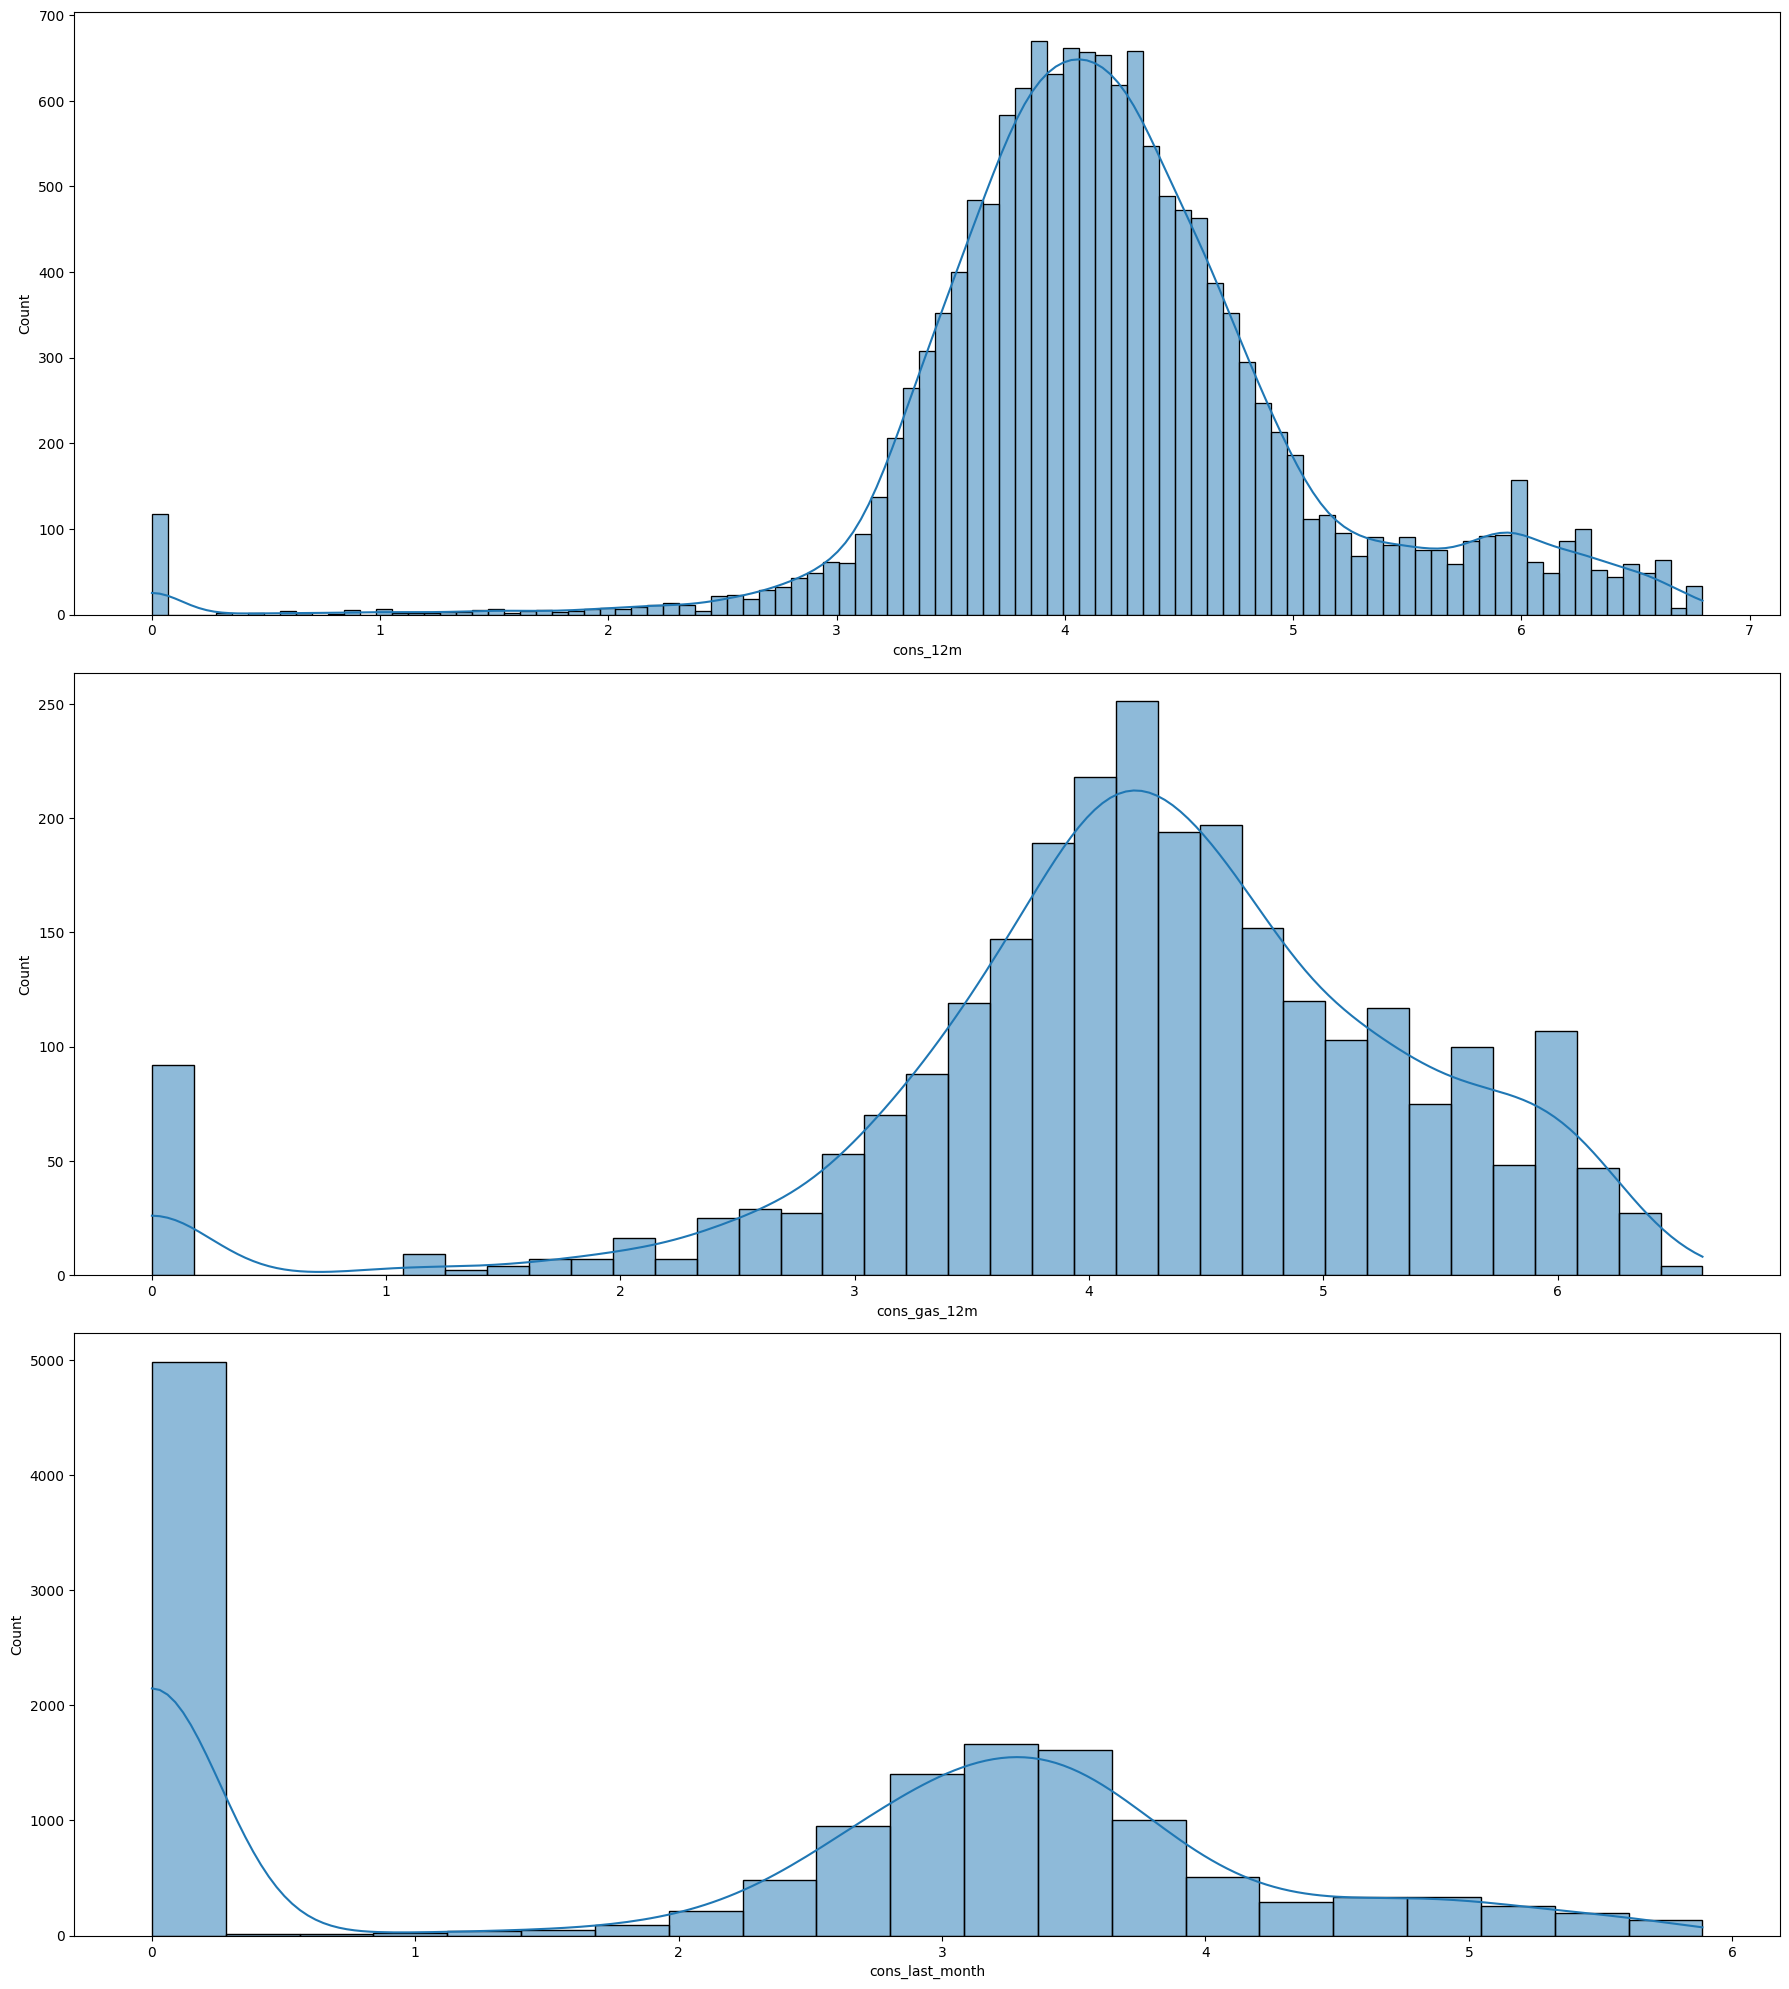

In [25]:
fig, axs = plt.subplots(3,1, figsize=(18, 20))

# Plot histograms
sns.histplot((df["cons_12m"].dropna()), kde=True, ax=axs[0])
sns.histplot((df[df["has_gas"]==1]["cons_gas_12m"].dropna()), kde=True, ax=axs[1])
sns.histplot((df["cons_last_month"].dropna()), kde=True, ax=axs[2])

plt.tight_layout()
plt.show()


Please note that features engineering is a relative process, anyone can create their own features but will they suite our predictive model or not ? we can't say at this stage. This is why i prefer going straight to the point and dive into machine learning, at model developement stage we can decide weather we define new features, delete some other ones or adjust some others in order to get better predictions.

Please continue for the next section about model development and evaluation to predict churn based on historical and engineered data.